### Titanic Kaggle Uygulaması

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 96CD-8CA1

 Directory of C:\Users\flutt\btk akademi\3.hafta

09/03/2024  15:42    <DIR>          .
09/03/2024  11:01    <DIR>          ..
09/03/2024  11:10    <DIR>          .ipynb_checkpoints
09/03/2024  11:02             3,258 gender_submission.csv
09/03/2024  11:02            28,629 test.csv
09/03/2024  15:42           244,683 Titanic-kaggle.ipynb
09/03/2024  11:02            61,194 train.csv
09/03/2024  11:03               589 Untitled.ipynb
09/03/2024  11:03               589 Untitled1.ipynb
               6 File(s)        338,942 bytes
               3 Dir(s)  34,911,055,872 bytes free


In [3]:
df_trained=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

# Veri Önişleme

In [4]:
df_trained.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#parch ebeyven cocuk sayıs
#sibsb kardeş eş sayısı gemide
#fare bilet fiyat
# embarkede hangi limanda kalktığı
#pclass 3 2 1 

In [6]:
df=pd.concat([df_trained,df_test])

In [7]:
df.shape

(1309, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
numeric_columns=df.select_dtypes(include=['number']) #corelasyondan sadece sayısal kısmı kullanmak için

In [12]:
numeric_columns.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [13]:
numeric_columns.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
#df.describe(include='all'),top encok tekrar edilenler
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


<Axes: >

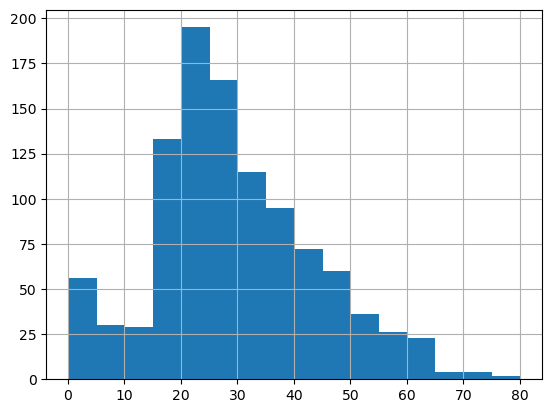

In [15]:

df['Age'].hist(bins=16)#kac kategoriye bölsün diye yazılırbins parametresinin kullanılması, veri setini belli bir sayıda aralığa böler ve bu aralıklara göre histogramın çubuklarını oluşturur. Bu, verinin dağılımını daha iyi anlamak ve görselleştirmek için önemlidir. Fazla veya az sayıda çubuk kullanmak, verinin dağılımını anlamakta zorluk çıkarabilir veya yanıltıcı sonuçlar verebilir. Bu nedenle, uygun sayıda bins kullanmak önemlidir.

<Axes: >

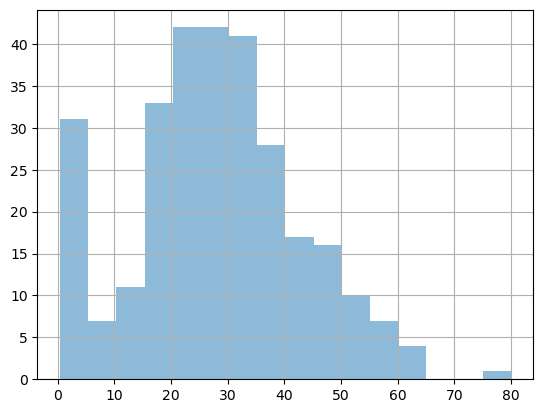

In [16]:
df[df['Survived']==1]['Age'].hist(bins=16, alpha=0.5) #Bu kod, DataFrame içindeki 'Survived' sütununda değeri 1 olan 
#satırları seçer ve bu satırların karşılık gelen 'Age' sütununu alır. Daha sonra, bu yaş verilerini 16 farklı aralığa böler 
#ve her aralıktaki veri noktalarının sıklığını gösteren bir histogram oluşturur. alpha=0.5 parametresi, 
#çizimin şeffaflığını ayarlar, böylece farklı histogramların üst üste gelmesi durumunda veriler daha iyi görünür. Sonuç olarak, 
#bu kod hayatta kalanların yaşlarının dağılımını basit bir şekilde görselleştirir.

In [17]:
df['Survived'].groupby([df['Sex']]).value_counts(normalize=True) #
#Bu kod, DataFrame'deki 'Survived' sütununu cinsiyet ('Sex') sütununa göre gruplar ve 
#her bir grupta hayatta kalanların oranını hesaplar.
#groupby([df['Sex']]) ifadesi, 'Sex' sütununa göre veriyi gruplar. 
#Ardından, value_counts(normalize=True) fonksiyonu, her grup içindeki 'Survived' sütunundaki değerleri sayar ve
#normalize eder. Normalize etme işlemi, her bir değerin toplam sayıya oranını hesaplayarak, her bir değerin yüzde oranını verir.
#Bu şekilde, her cinsiyet için hayatta kalanların oranı elde edilir.

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

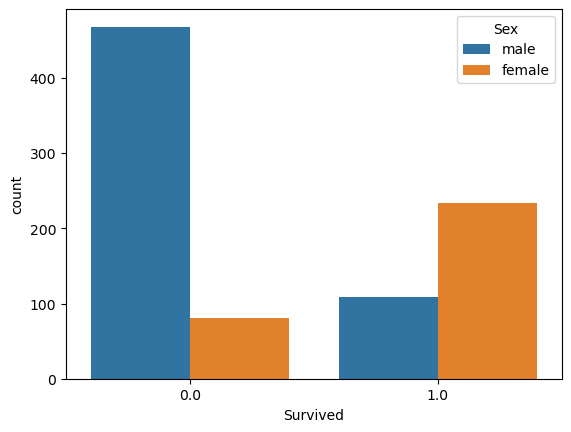

In [18]:
sns.countplot(x='Survived', hue='Sex', data=df)


In [19]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<Axes: xlabel='Survived', ylabel='count'>

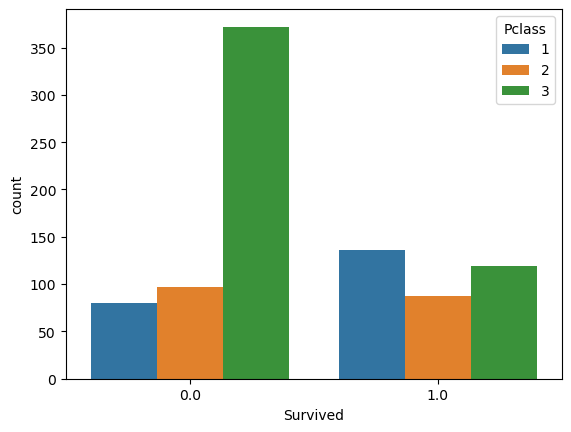

In [20]:
sns.countplot(x='Survived', hue='Pclass', data=df )


In [21]:
df_2=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'female')]


In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 to 887
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Survived     91 non-null     float64
 2   Pclass       91 non-null     int64  
 3   Name         91 non-null     object 
 4   Sex          91 non-null     object 
 5   Age          82 non-null     float64
 6   SibSp        91 non-null     int64  
 7   Parch        91 non-null     int64  
 8   Ticket       91 non-null     object 
 9   Fare         91 non-null     float64
 10  Cabin        78 non-null     object 
 11  Embarked     89 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 9.2+ KB


<Axes: xlabel='Age', ylabel='Count'>

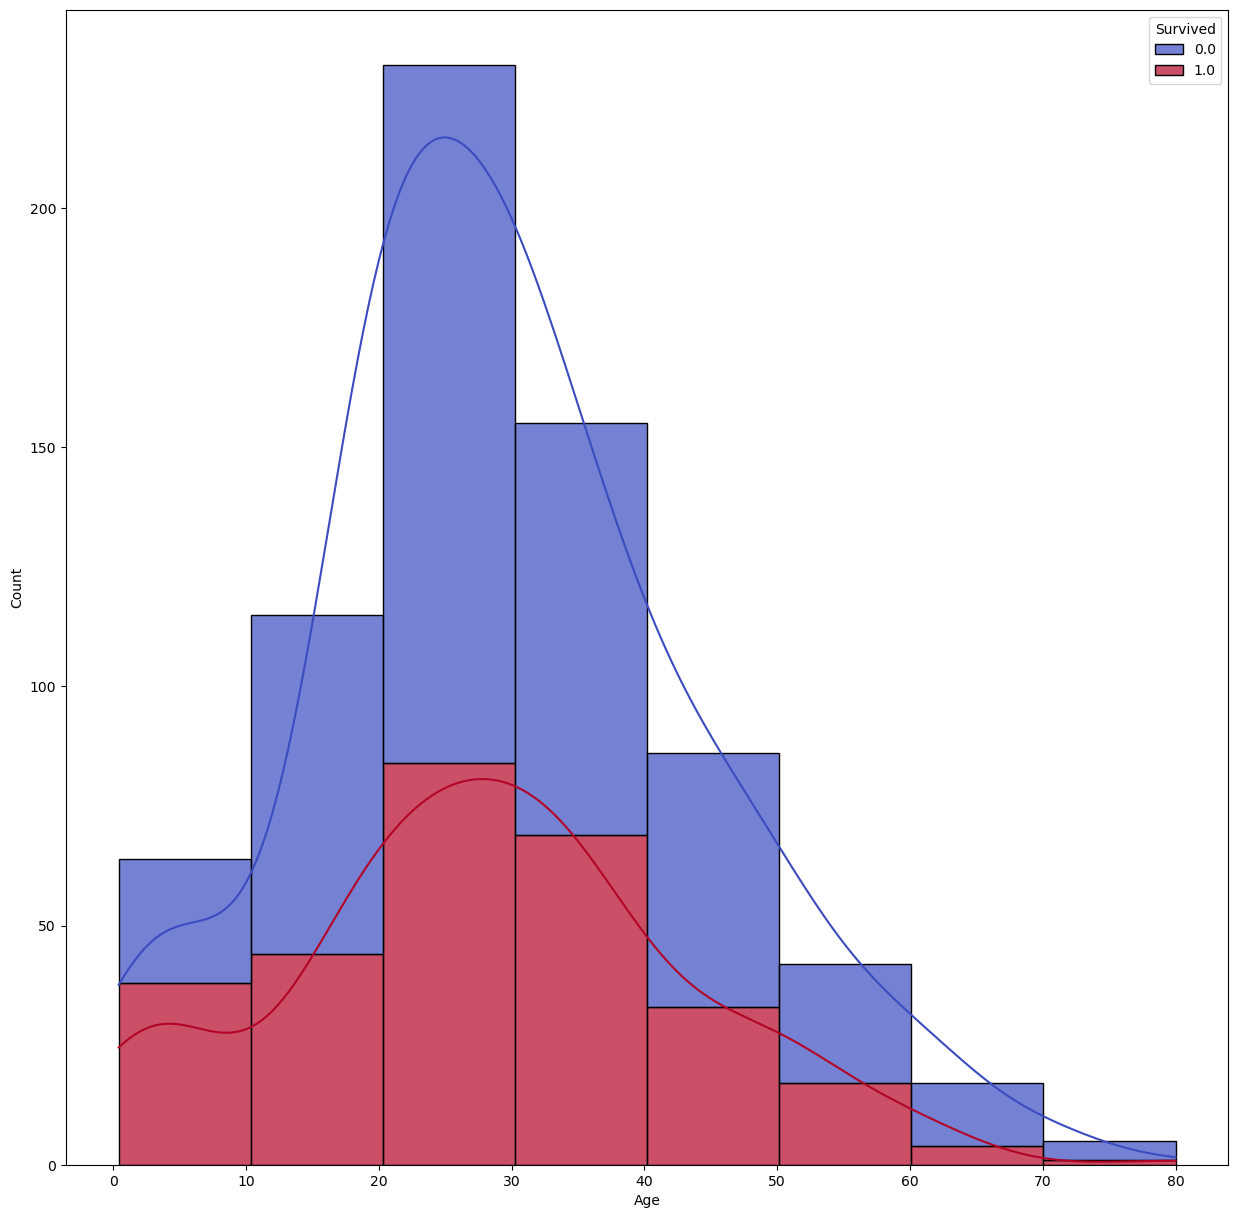

In [23]:
plt.figure(figsize=(15,15))
df_3=df.reset_index(drop=True)
sns.histplot(data=df_3, x='Age', hue='Survived', multiple='stack', kde=True, palette='coolwarm', bins=8, alpha=.7)
# Veriye dayalı olarak histogram çizer
# x='Age' : Histogramın x ekseninde kullanılacak sütun
# hue='Survived' : Renklendirme yapılacak sütun
# multiple='stack' : Yığınlayarak gösterir
# kde=True : Yoğunluk tahminini (KDE - Kernel Density Estimation) ekler
# palette='coolwarm' : Renk paletini belirler
# bins=8 : Histogramdaki çubuk sayısını belirler
# alpha=.7 : Şeffaflık seviyesini belirler

In [24]:
df['Survived'].groupby(df['Embarked']).value_counts(normalize=True)

Embarked  Survived
C         1.0         0.553571
          0.0         0.446429
Q         0.0         0.610390
          1.0         0.389610
S         0.0         0.663043
          1.0         0.336957
Name: proportion, dtype: float64

In [25]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [26]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [27]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [28]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [29]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [30]:
df['Age'].groupby(df['Title']).mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [31]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))


In [32]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
413    32.811056
414    39.000000
415    38.500000
416    32.811056
417     5.482642
Name: Age, Length: 1309, dtype: float64

In [33]:
df['Age'].isnull().sum()

0

<Axes: >

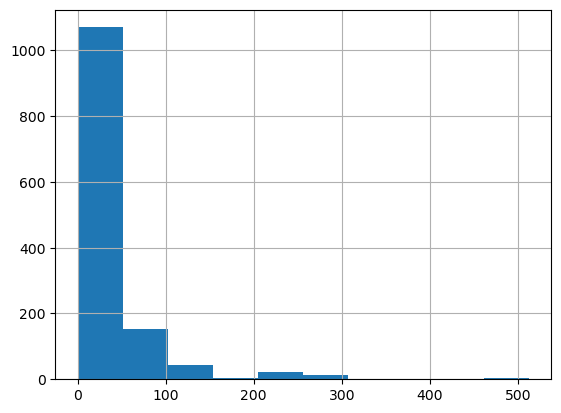

In [34]:
df['Fare'].hist()

In [35]:
#df['Fare']>500
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [36]:
df.Fare.median() #df['Fare'].median() aynı kullanım aynı sonucu veriyor

14.4542

<Axes: >

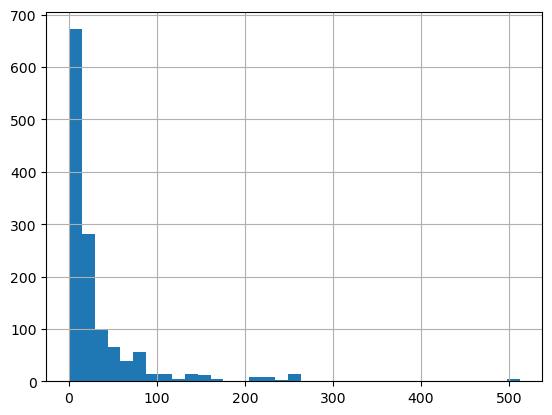

In [37]:
df['Fare'].hist(bins=35)

In [38]:
 df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)


In [39]:
df.Fare.isnull().sum()

0

In [40]:
 df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

#Normalde, Pandas işlemleri yeni bir DataFrame döndürür ve orijinal DataFrame'i değiştirmez. 
#Ancak, inplace=True parametresi kullanıldığında, işlem doğrudan orijinal 
#DataFrame üzerinde gerçekleştirilir ve yeni bir DataFrame döndürülmez. Bu, işlemi gerçekleştirdikten 
#sonra tekrar bir atama yapmanıza gerek kalmaz.

In [41]:
df.Embarked.isnull().sum()

0

In [42]:
y=df['Survived']
x=df.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Title     1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [44]:
x=pd.get_dummies(x,drop_first=True) #pd.get_dummies(): Pandas kütüphanesinin bir işlevi olan get_dummies() 
#fonksiyonu, kategorik değişkenleri dummy değişkenlere dönüştürmek için kullanılır.

In [45]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [46]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
dtype: int64

In [47]:
df_trained.shape

(891, 12)

In [1]:
X_train=x[:891]
X_test=x[891:]
y_train=y[:891]
y_test=y[891:]
X_test.head()


NameError: name 'x' is not defined

# Building Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [51]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [53]:
model_classification(X_train,y_train)

Model:  GaussianNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[132  30]
 [ 25  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       162
         1.0       0.73      0.76      0.75       106

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[134  32]
 [ 23  79]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       166
         1.0       0.71      0.77      0.74       102

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------

C:\Users\flutt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  RandomForestClassifier()
Model Accuracy:  0.8059701492537313
Model Confusion Matrix:  [[135  30]
 [ 22  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       165
         1.0       0.73      0.79      0.76       103

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

--------------------------------------------------
Model:  GradientBoostingClassifier()
Model Accuracy:  0.8208955223880597
Model Confusion Matrix:  [[144  35]
 [ 13  76]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       179
         1.0       0.68      0.85      0.76        89

    accuracy                           0.82       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.82      0.82     

(GradientBoostingClassifier(),
 0.8208955223880597,
 array([[130,  50],
        [ 27,  61]], dtype=int64))

In [57]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
y_pred


array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [61]:
submission=pd.DataFrame({'PassengerId':df_test['PassengerId'],
                         'Survived':y_pred.astype(int)
    
    
    
    
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [63]:
submission.to_csv('submission1_titanic.csv',index=False)

# Best Parametres

# xg boost için

In [55]:
import matplotlib.pyplot as plt
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [54]:
import matplotlib.pyplot as plt
import xgboost as xgb

dmatrix = xgb.DMatrix(data=X, label=y)

# Creata the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Create list of number of boosting rounds
num_rounds = [50,60,70,80,90,100,110,120]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Interate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=6, 
                        num_boost_round=curr_num_rounds, metrics='rmse', 
                        as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results['test-rmse-mean'].tail().values[-1])
    
# Print the result DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses, columns=['num_boosting_rounds', 'rmse']))

ModuleNotFoundError: No module named 'xgboost'